<a href="https://colab.research.google.com/github/NakulSingh30/HeartDiseasePrediction/blob/main/Heart_Disesase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [2]:
heart_data = pd.read_csv('/content/data.csv')

In [5]:
# Parameters of the above heart data
# age: The person's age in years
# sex: The person's sex (1 = male, 0 = female)
# cp: The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
# trestbps: The person's resting blood pressure (mm Hg on admission to the hospital)
# chol: The person's cholesterol measurement in mg/dl
# fbs: The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false)
# restecg: Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
# thalach: The person's maximum heart rate achieved
# exang: Exercise induced angina (1 = yes; 0 = no)
# oldpeak: ST depression induced by exercise relative to rest
# slope: the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
# ca: The number of major vessels (0-3)
# thal: A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)

# target: Heart disease (0 = no, 1 = yes)


# first 5 values
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [8]:
#last 5 values
heart_data.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [11]:
# numebr of rows and columns
heart_data.shape 

(303, 14)

In [12]:
# getting more info about dataset
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [15]:
#check for missing values
heart_data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [16]:
#statistics of data
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [18]:
#checking the distribution of persons who have heartdisease or not
distribution = heart_data.groupby("target").size()
distribution

target
0    138
1    165
dtype: int64

# Checking the distribution of targets


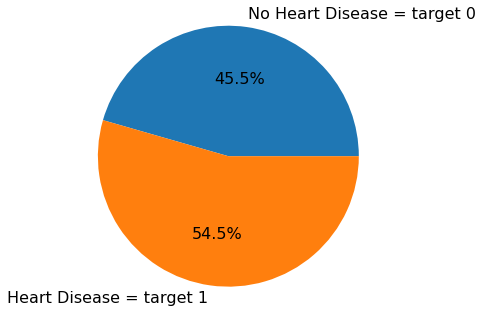

In [24]:
plt.pie(distribution.values, labels = ["No Heart Disease = target 0", "Heart Disease = target 1"], autopct='%1.1f%%', radius = 1.5, textprops = {"fontsize" : 16}) 
plt.show()

# Checking Distribution Of Data according to the gender of paitients (1 = male and 0 = female


In [40]:
heart_data_gender = heart_data.groupby(["sex","target"]).size()
heart_data_gender

sex  target
0    0          24
     1          72
1    0         114
     1          93
dtype: int64

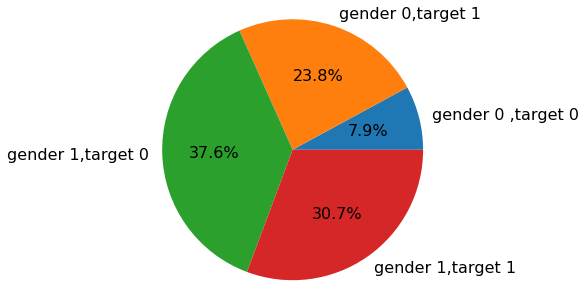

In [42]:
plt.pie(heart_data_gender.values, labels = ["gender 0 ,target 0", "gender 0,target 1", "gender 1,target 0", "gender 1,target 1"],autopct='%1.1f%%',radius = 1.5, textprops = {"fontsize" : 16})
plt.show()

# Splitting Features and Target (Target = Result whether a person has heart disease or not )


In [25]:
heart_features = heart_data.drop(columns='target', axis=1)
targets = heart_data['target']

In [28]:
heart_features.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2


# Splitting Data into training data and test data 

In [47]:
heart_features_train, heart_features_test, targets_train, targets_test = train_test_split(heart_features, targets,test_size = 0.2, stratify=targets, random_state=2)


In [48]:
# Checking how data is distributed
print(heart_features.shape, heart_features_train.shape, heart_features_test.shape)

(303, 13) (242, 13) (61, 13)


# Training Model

In [43]:
model = LogisticRegression()

In [49]:
#training model with training data
model.fit(heart_features_train, targets_train)


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

# Model Evalutation


In [51]:
#accuracy score on training data
heart_disease_train_prediction = model.predict(heart_features_train)
train_data_accuracy = accuracy_score(heart_disease_train_prediction, targets_train)
print('Accuracy on training data : ', train_data_accuracy )

Accuracy on training data :  0.8512396694214877


In [52]:
#accuracy score on test data
heart_disease_test_prediction = model.predict(heart_features_test)
test_data_accuracy = accuracy_score(heart_disease_test_prediction, targets_test)
print('Accuracy on training data : ', test_data_accuracy )

Accuracy on training data :  0.819672131147541


In [53]:
#making predictive system
input_data = (63,1,3,145,233,1,0,150,0,2.3,0,0,1)

# taking input as numpy array
numpy_input_array = np.asarray(input_data)

#reshaping data 
reshaped_data = numpy_input_array.reshape(1, -1)

# predicting the output
prediciton = model.predict(reshaped_data)

print(prediciton)


[1]
